In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
 
df = pd.read_csv(r'C:\Users\andyh\Downloads\movies python\movies.csv')
#Importing the movies file to check for correlation between variables.

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


df.head()

In [5]:
#Search if any data is missing
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(('{} - {}%'.format(col,percent_missing)))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [4]:
#Drop all missing values
df = df.dropna()

In [6]:
#Checking data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Change column data type
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)
df['score'] = pd.to_numeric(df['score'], errors='coerce').fillna(0).astype(float)

In [8]:
pd.set_option('display.max_rows',15)
df.sort_values(by=['gross'],inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1518815515,Marvel Studios,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2270,Embassy Pictures,85.0
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000.0,309,Daybreak,85.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,-2147483648,Twentieth Century Fox,194.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,-2147483648,Marvel Studios,181.0


In [9]:
#Drop Titanic, Avengers:Endgame, Avatar as they have negative gross values
df.drop(index=[3045,7445,5445],inplace=True)

In [10]:
#create corrected year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [11]:
#Check for any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

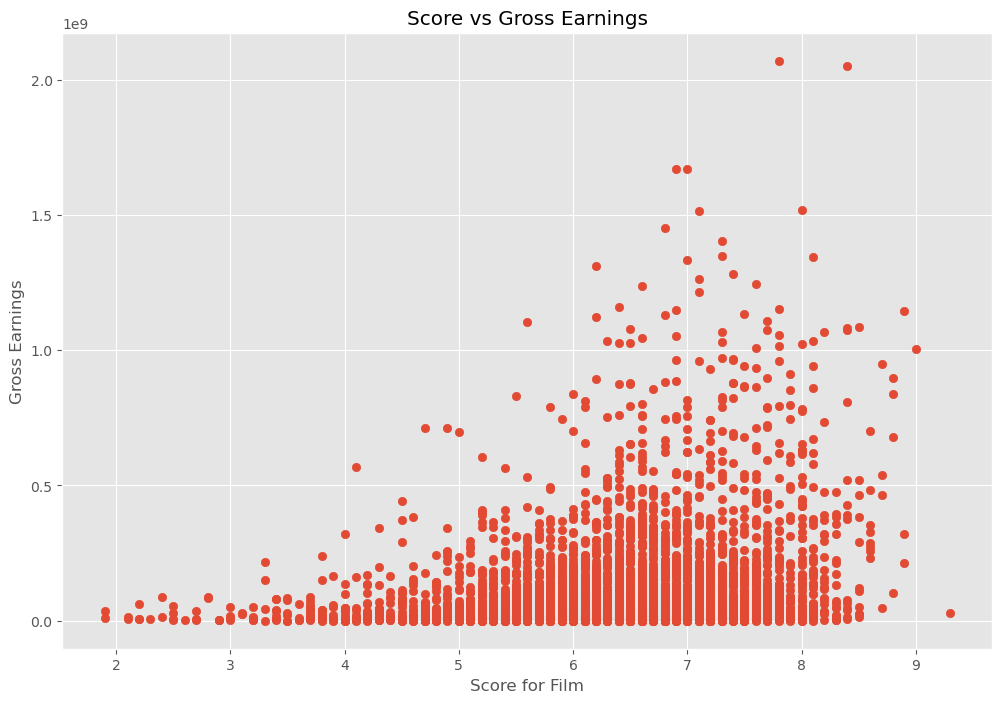

In [12]:
#Scatter Plot with Score vs Gross

plt.scatter(x=df['score'],y=df['gross'])
plt.title('Score vs Gross Earnings')

plt.xlabel('Score for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='score', ylabel='gross'>

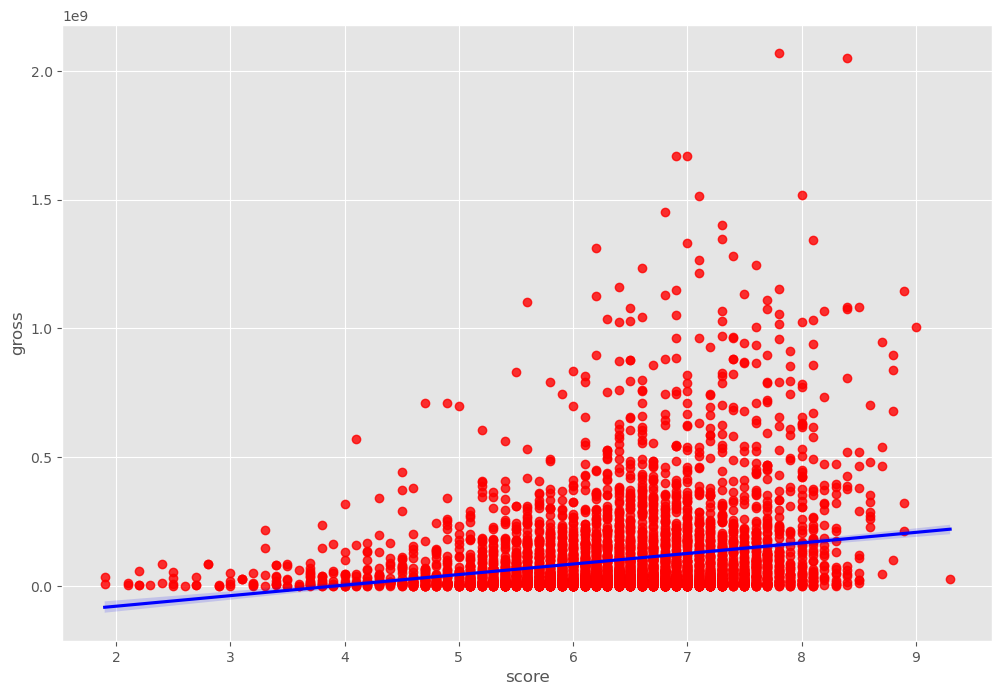

In [13]:
#Plot the score vs Gross using seaborn

sns.regplot(x='score',y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [14]:
#Lets start looking at Corelation
df.corr(method='pearson',numeric_only=True) #Pearson, Kendall, Spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.055746,0.205973,0.328175,0.283780,0.074210,0.998725
score,0.055746,1.000000,0.473405,0.067334,0.221701,0.412577,0.061303
votes,0.205973,0.473405,1.000000,0.431864,0.613791,0.345443,0.203070
budget,0.328175,0.067334,0.431864,1.000000,0.743536,0.311063,0.320740
gross,0.283780,0.221701,0.613791,0.743536,1.000000,0.261947,0.277989
runtime,0.074210,0.412577,0.345443,0.311063,0.261947,1.000000,0.074460
yearcorrect,0.998725,0.061303,0.203070,0.320740,0.277989,0.074460,1.000000


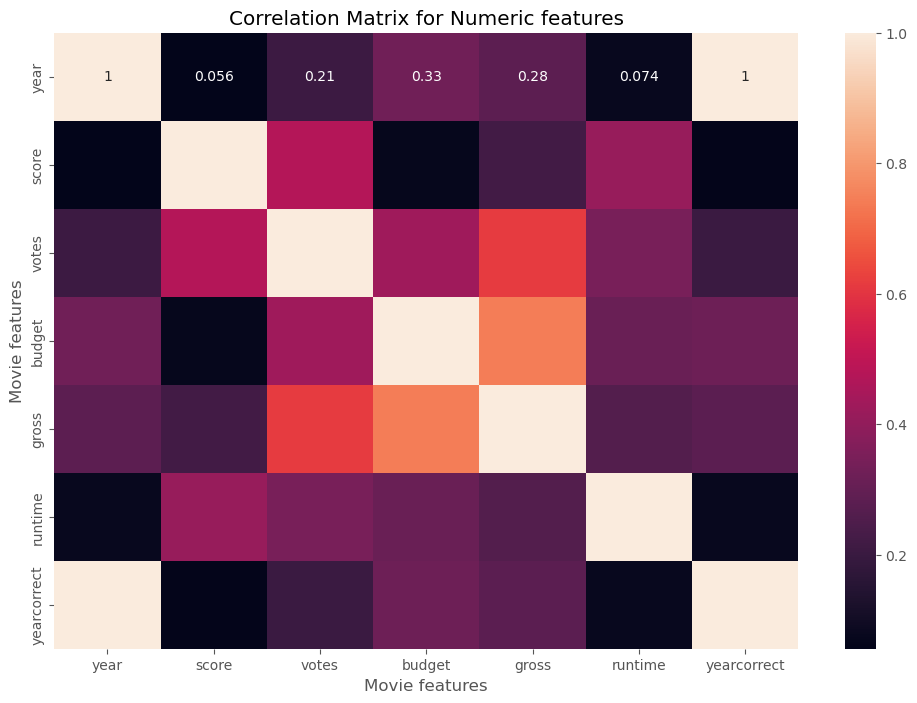

In [15]:
#High corelation between budget and gross
correlation_matrix=df.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')

plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

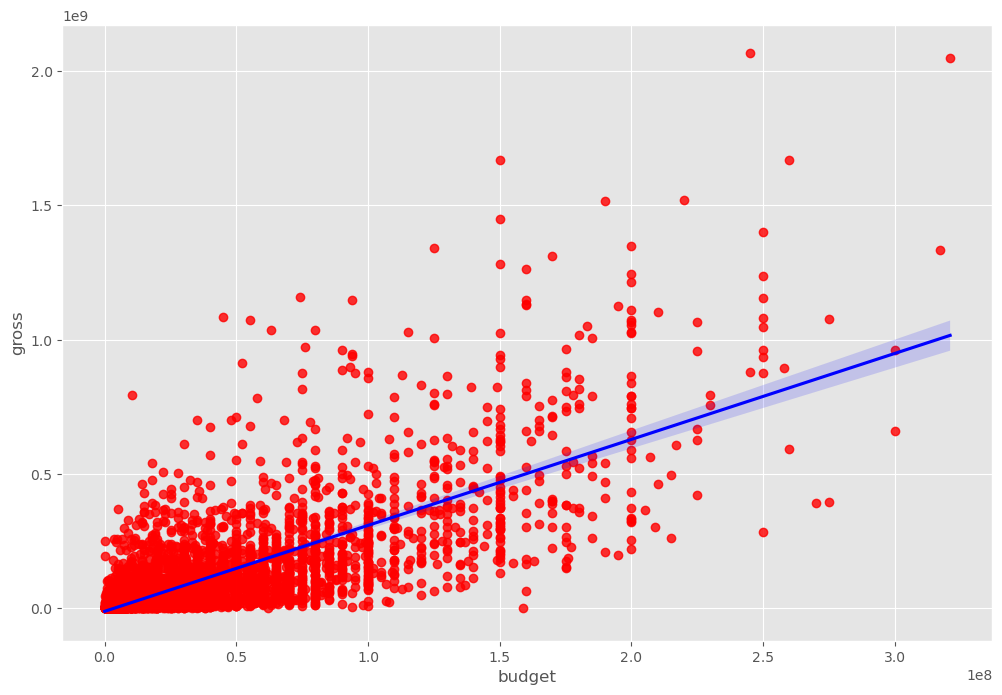

In [17]:
#Plot the Budget vs Gross using seaborn

sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [18]:
df_numerized=df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4690,6,6,1980,1303,8.4,927000.0,1795,2832,699,46,19000000.0,46998772,1426,146.0,1980
1,3927,6,1,1980,1126,5.8,65000.0,1578,1158,214,47,4500000.0,58853106,452,104.0,1980
2,3639,4,0,1980,1358,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067,945,124.0,1980
3,204,4,4,1980,1126,7.7,221000.0,889,1413,1474,47,3500000.0,83453539,1108,88.0,1980
4,730,6,4,1980,1169,7.3,108000.0,719,351,271,47,6000000.0,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,3551,4,6,1980,2293,7.2,27000.0,847,2507,315,47,5100000.0,9709597,1184,103.0,1980
17,66,4,4,1980,529,6.9,29000.0,333,2315,739,47,10000000.0,103300686,815,109.0,1980
18,4141,6,9,1980,831,6.8,66000.0,943,1486,19,47,1000000.0,21448782,45,89.0,1980
20,984,6,5,1980,713,6.5,20000.0,2032,3151,25,48,11000000.0,19814523,939,102.0,1980


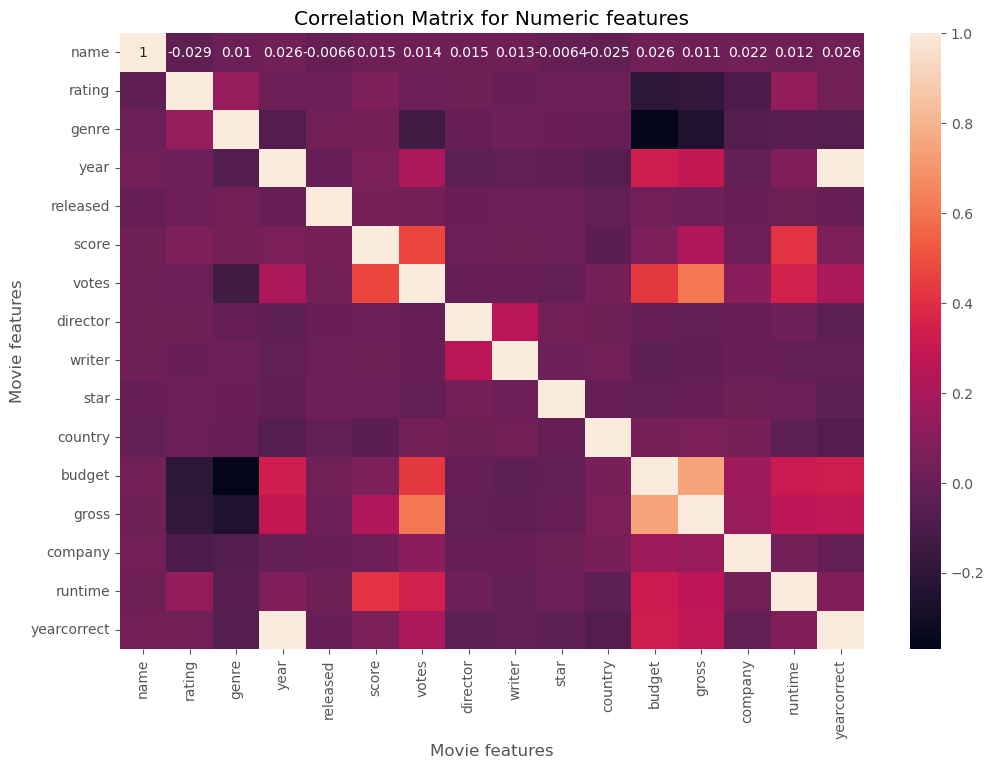

In [19]:
correlation_matrix=df_numerized.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')

plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [20]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029317,0.010041,0.026334,-0.006593,0.015062,0.013925,0.014821,0.012562,-0.006365,-0.025411,0.026016,0.011162,0.021761,0.011560,0.026328
rating,-0.029317,1.000000,0.147796,0.019580,0.017957,0.066235,0.006672,0.014561,-0.003229,0.009295,0.008271,-0.205162,-0.190168,-0.092285,0.141883,0.022102
genre,0.010041,0.147796,1.000000,-0.072589,0.021763,0.035701,-0.135750,-0.008950,0.017288,0.003795,-0.009073,-0.369849,-0.252619,-0.071289,-0.058777,-0.068569
year,0.026334,0.019580,-0.072589,1.000000,-0.001223,0.055746,0.205973,-0.037873,-0.025535,-0.032607,-0.066891,0.328175,0.283780,-0.014445,0.074210,0.998725
released,-0.006593,0.017957,0.021763,-0.001223,1.000000,0.047067,0.032279,0.001683,0.007586,0.016275,-0.017016,0.024001,0.018392,-0.001950,0.011608,-0.005485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
budget,0.026016,-0.205162,-0.369849,0.328175,0.024001,0.067334,0.431864,-0.006731,-0.037460,-0.024360,0.052415,1.000000,0.743536,0.169787,0.311063,0.320740
gross,0.011162,-0.190168,-0.252619,0.283780,0.018392,0.221701,0.613791,-0.024442,-0.032490,-0.006696,0.060685,0.743536,1.000000,0.151729,0.261947,0.277989
company,0.021761,-0.092285,-0.071289,-0.014445,-0.001950,0.020015,0.117002,-0.007991,-0.003500,0.013768,0.048432,0.169787,0.151729,1.000000,0.036054,-0.018913
runtime,0.011560,0.141883,-0.058777,0.074210,0.011608,0.412577,0.345443,0.019351,-0.016178,0.008529,-0.035374,0.311063,0.261947,0.036054,1.000000,0.074460


In [27]:
pd.set_option('display.max_rows',None)
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029317
             genre          0.010041
             year           0.026334
             released      -0.006593
             score          0.015062
             votes          0.013925
             director       0.014821
             writer         0.012562
             star          -0.006365
             country       -0.025411
             budget         0.026016
             gross          0.011162
             company        0.021761
             runtime        0.011560
             yearcorrect    0.026328
rating       name          -0.029317
             rating         1.000000
             genre          0.147796
             year           0.019580
             released       0.017957
             score          0.066235
             votes          0.006672
             director       0.014561
             writer        -0.003229
             star           0.009295
             country        0.008271
 

In [31]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs.all

<bound method Series.all of genre        budget        -0.369849
budget       genre         -0.369849
gross        genre         -0.252619
genre        gross         -0.252619
rating       budget        -0.205162
budget       rating        -0.205162
rating       gross         -0.190168
gross        rating        -0.190168
votes        genre         -0.135750
genre        votes         -0.135750
company      rating        -0.092285
rating       company       -0.092285
country      yearcorrect   -0.073711
yearcorrect  country       -0.073711
year         genre         -0.072589
genre        year          -0.072589
             company       -0.071289
company      genre         -0.071289
genre        yearcorrect   -0.068569
yearcorrect  genre         -0.068569
year         country       -0.066891
country      year          -0.066891
genre        runtime       -0.058777
runtime      genre         -0.058777
score        country       -0.043403
country      score         -0.043403
year      

In [28]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.613791
votes        gross          0.613791
budget       gross          0.743536
gross        budget         0.743536
year         yearcorrect    0.998725
yearcorrect  year           0.998725
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Votes and Gross have the highest correlation 